In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
import numpy as np
import scipy

import influence.logistic_regression
import experiments
import experiments.counterexamples
from experiments.plot import *

from datasets.common import DataSet


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [702]:
def plot_newton_pred(ax, test_idx, subset_subset=None):
    pred = E.R['cex_subset_test_pred_margin_infl'][:, test_idx]
    newton = E.R['cex_subset_test_newton_pred_margin_infl'][:, test_idx]
    if subset_subset is not None:
        pred = pred[subset_subset]
        newton = newton[subset_subset]
    plot_influence_correlation(ax, pred.reshape(-1), newton.reshape(-1),
                               xlabel='',
                               ylabel='',
                               title=E.R['cex_tags'][test_idx] + ' N/P',
                               spearmanr=False)

In [620]:
subset_subset = None

In [548]:
subset_subset = E.R['cex_lstsq_uv_K-100_subsets']

In [592]:
test_idx = np.random.choice(num_test)
test_tag = E.R['cex_tags'][test_idx]
print(test_idx, test_tag)

(767, u'lstsq_uv_K-33_gauss')


Loading phase 0-generate_datasets from previous run:
/u/nlp/influence/output/counterexamples/ortho2/result_0-generate_datasets.npz
Loading phase 1-training from previous run:
/u/nlp/influence/output/counterexamples/ortho2/result_1-training.npz
Loading phase 2-pick_subsets from previous run:
/u/nlp/influence/output/counterexamples/ortho2/result_2-pick_subsets.npz
Loading phase 3-retrain_and_newton from previous run:
/u/nlp/influence/output/counterexamples/ortho2/result_3-retrain_and_newton.npz
Loading phase 4-find_adversarial_test from previous run:
/u/nlp/influence/output/counterexamples/ortho2/result_4-find_adversarial_test.npz
Loading phase 5-compute_test_infl from previous run:
/u/nlp/influence/output/counterexamples/ortho2/result_5-compute_test_infl.npz
Experiment counterexamples: run ortho2 results loaded in 0.0559689998627 seconds.

(1026, u'cex_one')


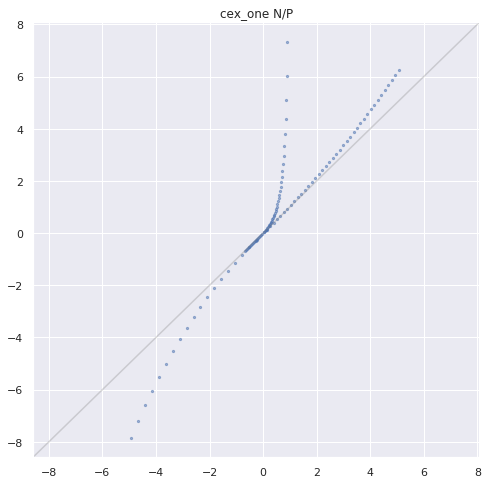

In [714]:
out_dir = '/u/nlp/influence/output/'
E = experiments.counterexamples.Counterexamples.load_run('ortho2', out_dir=out_dir)

#test_idx = np.nonzero(E.R['cex_tags'] == 'lstsq_uv_K-100_gauss')[0][0]
test_idx = np.nonzero(E.R['cex_tags'] == 'cex_one')[0][0]
#test_idx = 40
test_tag = E.R['cex_tags'][test_idx]
print(test_idx, test_tag)

num_test = E.R['cex_X'].shape[0]
R, C = 1, 1
fig, ax = plt.subplots(R, C, figsize=(8, 8), squeeze=False)
for r in range(R):
    for c in range(C):
        o = r * C + c
        if test_idx + o >= num_test: continue
        plot_newton_pred(ax[r][c], test_idx + o, subset_subset)

In [325]:
test_idx = 426
pred = E.R['cex_subset_test_pred_margin_infl'][:, test_idx]
newton = E.R['cex_subset_test_nparam_margin_infl'][:, test_idx]
which = newton > 0.70

In [414]:
subset_cos_dparam = E.R['subset_cos_dparam']
subset_pred_dparam = E.R['subset_pred_dparam']
subset_newton_pred_dparam = E.R['subset_newton_pred_dparam']
cos_indices = np.argsort(subset_cos_dparam)